In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from functools import partial

from dtumpc.plotting import plot_results
from dtumpc.simulation import simulate
from dtumpc.models import (
    default_params,
    sensor_deterministic, 
    sensor_stochastic, 
    disturbance_constant, 
    disturbance_piecewise_constant, 
    disturbance_sde
)

In [2]:
key = jax.random.key(0)

In [3]:
def constant_input(t, state):
    return jnp.array([300.0, 300.0])

def f1_varying(t, state):
    if t < 1200:
        u1 = 300.0
    elif t < 2400:
        u1 = 360.0
    else:
        u1 = 240.0
    return jnp.array([u1, 300.0])


def f2_varying(t, state):
    if t < 1200:
        u2 = 300.0
    elif t < 2400:
        u2 = 360.0
    else:
        u2 = 240.0
    return jnp.array([300.0, u2])

In [4]:
disturbance = partial(disturbance_constant, value=jnp.array([0.0, 0.0]))

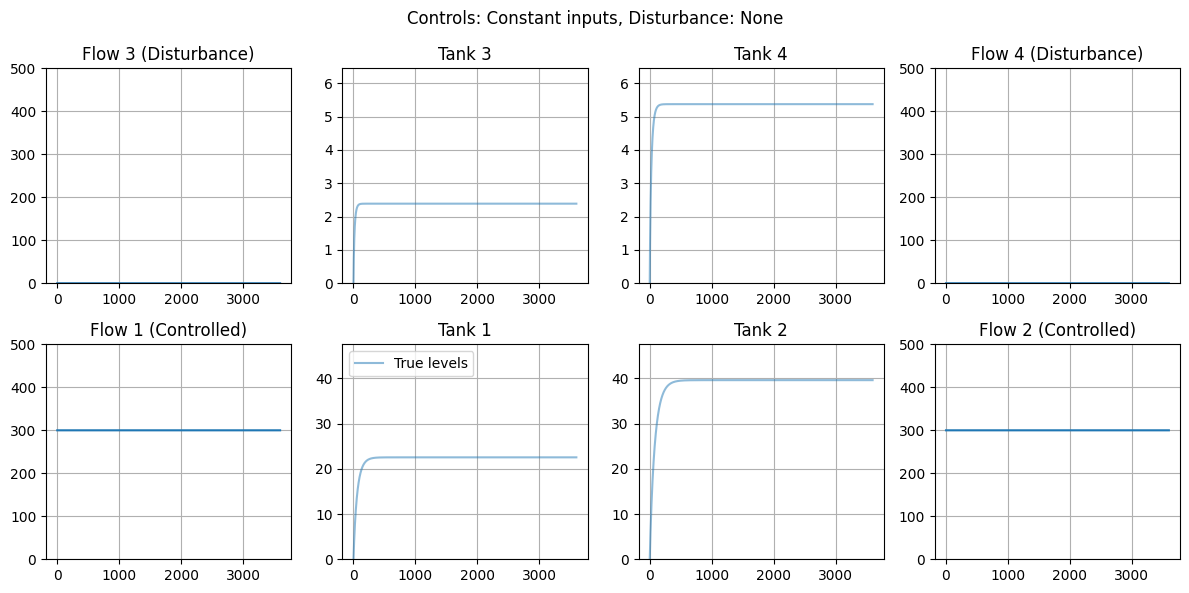

In [5]:
key, subkey = jax.random.split(key)

states, inputs, observations = simulate(
    constant_input,
    disturbance,
    sensor_deterministic,
    default_params,
    subkey,
)

plot_results(
    states, 
    inputs, 
    "Constant inputs", 
    "None",
    observations=None,
)

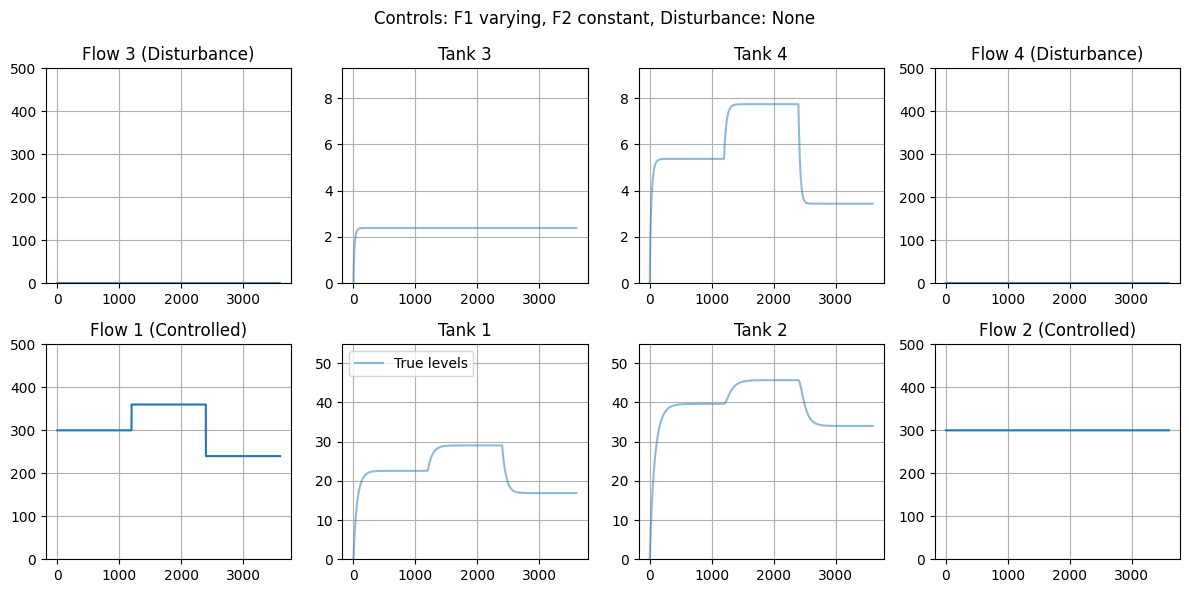

In [6]:
key, subkey = jax.random.split(key)

states, inputs, observations = simulate(
    f1_varying,
    disturbance,
    sensor_deterministic,
    default_params,
    subkey,
)

plot_results(
    states, 
    inputs, 
    "F1 varying, F2 constant", 
    "None",
    observations=None,
)

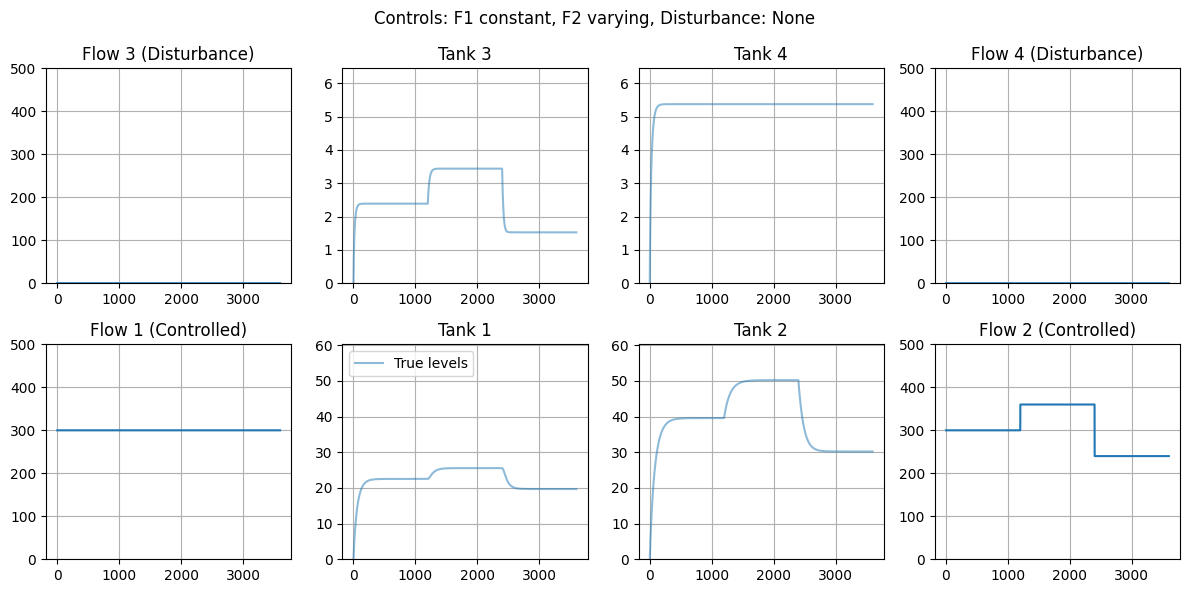

In [7]:
key, subkey = jax.random.split(key)

states, inputs, observations = simulate(
    f2_varying,
    disturbance,
    sensor_deterministic,
    default_params,
    subkey,
)

plot_results(
    states, 
    inputs, 
    "F1 constant, F2 varying", 
    "None",
    observations=None,
)

In [8]:
key, subkey = jax.random.split(key)

scale = 600
values = jax.random.uniform(key, shape=(3600 // scale, 2), minval=200, maxval=400)

disturbance = partial(disturbance_piecewise_constant, values=values, scale=scale)

sensor = partial(sensor_stochastic, std=5)

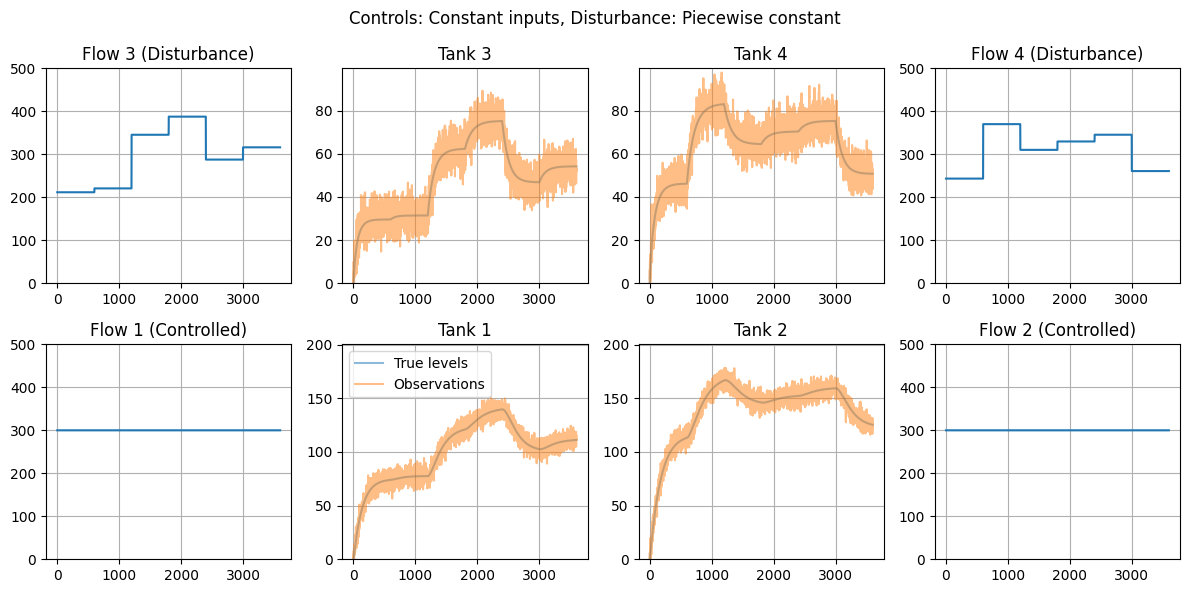

In [9]:
key, subkey = jax.random.split(key)

states, inputs, observations = simulate(
    constant_input,
    disturbance,
    sensor,
    default_params,
    subkey,
)

plot_results(
    states, 
    inputs, 
    "Constant inputs", 
    "Piecewise constant",
    observations=observations,
)

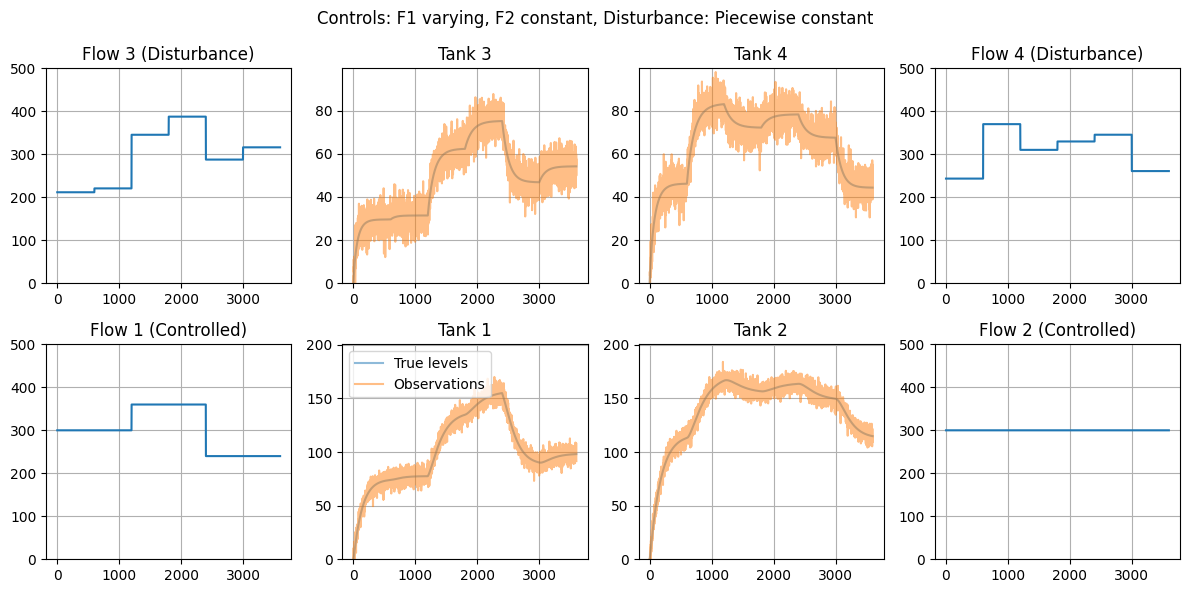

In [10]:
key, subkey = jax.random.split(key)

states, inputs, observations = simulate(
    f1_varying,
    disturbance,
    sensor,
    default_params,
    subkey,
)

plot_results(
    states, 
    inputs, 
    "F1 varying, F2 constant", 
    "Piecewise constant",
    observations=observations,
)

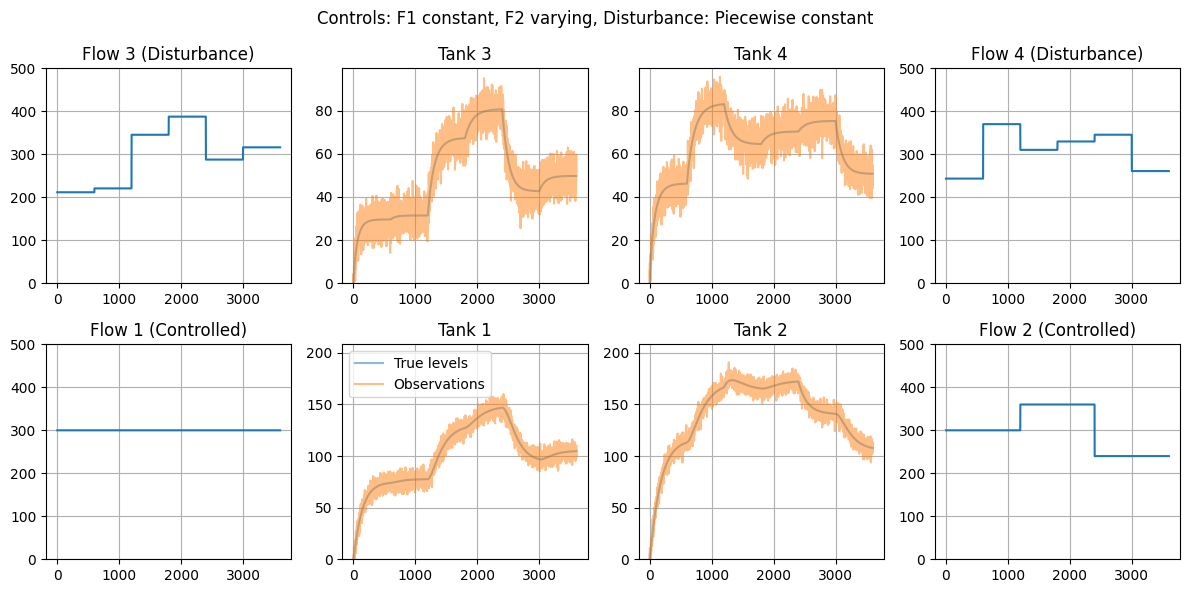

In [11]:
key, subkey = jax.random.split(key)

states, inputs, observations = simulate(
    f2_varying,
    disturbance,
    sensor,
    default_params,
    subkey,
)

plot_results(
    states, 
    inputs, 
    "F1 constant, F2 varying", 
    "Piecewise constant",
    observations=observations,
)

In [12]:
key, subkey = jax.random.split(key)

mean = jnp.array([300, 300])
cov = jnp.array([
    [30**2, 0],
    [0, 10**2],
])

disturbance = partial(disturbance_sde, mean=mean, cov=cov)

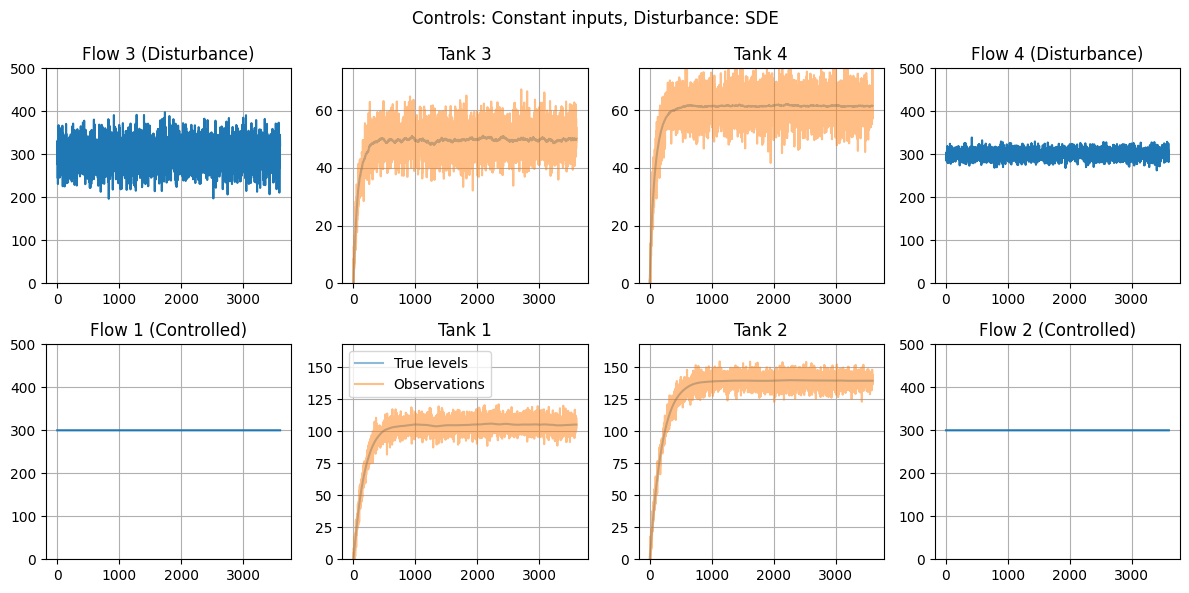

In [13]:
key, subkey = jax.random.split(key)

states, inputs, observations = simulate(
    constant_input,
    disturbance,
    sensor,
    default_params,
    subkey,
)

plot_results(
    states, 
    inputs, 
    "Constant inputs", 
    "SDE",
    observations=observations,
)

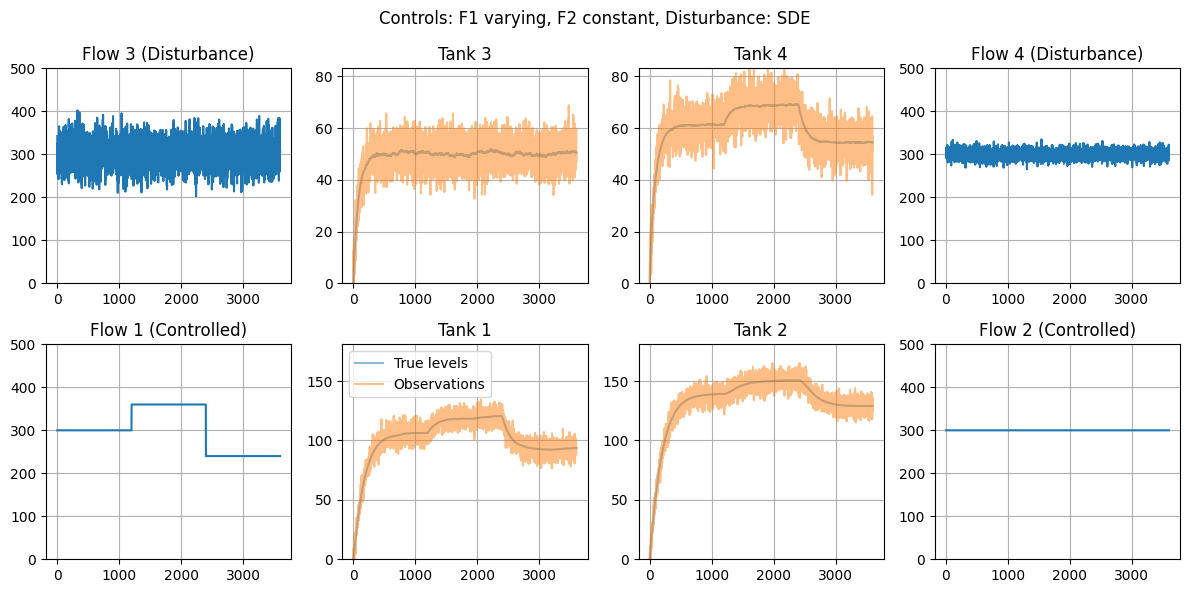

In [14]:
key, subkey = jax.random.split(key)

states, inputs, observations = simulate(
    f1_varying,
    disturbance,
    sensor,
    default_params,
    subkey,
)

plot_results(
    states, 
    inputs, 
    "F1 varying, F2 constant", 
    "SDE",
    observations=observations,
)

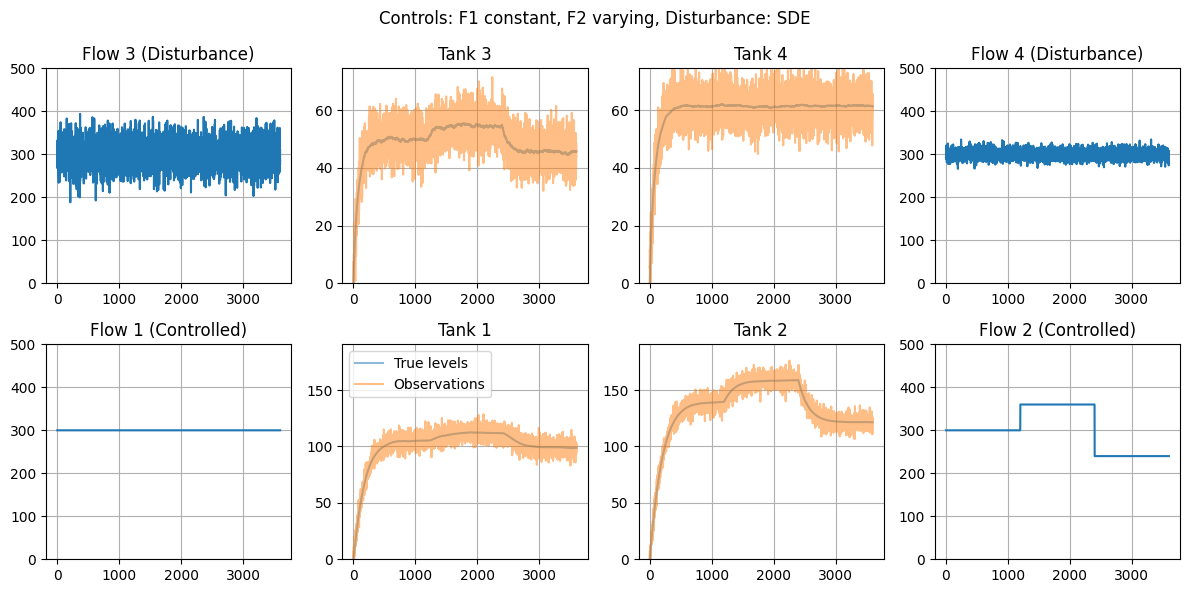

In [15]:
key, subkey = jax.random.split(key)

states, inputs, observations = simulate(
    f2_varying,
    disturbance,
    sensor,
    default_params,
    subkey,
)

plot_results(
    states, 
    inputs, 
    "F1 constant, F2 varying", 
    "SDE",
    observations=observations,
)